In [1]:
from __future__ import division
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams["figure.figsize"] = (15,5)

# Problem 1

### PDF

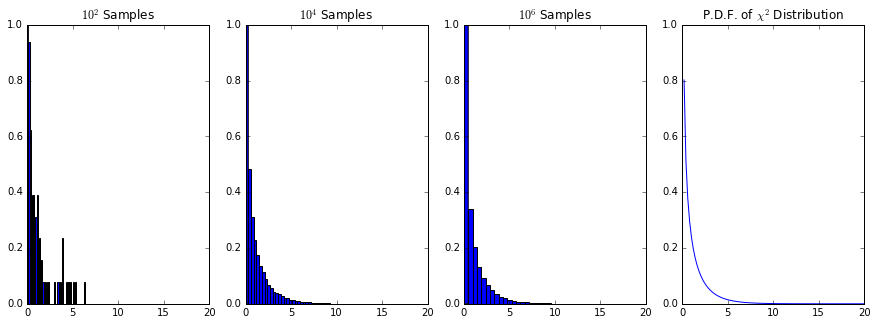

In [2]:
for i, k in enumerate([2,4,6]):
    plt.subplot(1,4,i+1)
    X = np.random.randn(10**k)**2
    plt.hist(X, bins=50, normed=True)
    plt.xlim(0,20)
    plt.ylim(0,1)
    plt.title("$10^%d$ Samples"%k)
    
plt.subplot(1,4,4)
x = np.linspace(0,20,100)
plt.plot(x, stats.chi2.pdf(x, 1))
plt.ylim(0,1)
plt.title("P.D.F. of $\chi^2$ Distribution")
plt.show()

### CDF

In [3]:
for x in [0.5, 1, 1.5]:
    for k in [2,4,6]:
        X = np.random.randn(10**k)**2
        print "10^%d samples,"%k, "x={:1.1f},".format(x), sum(X <= x)/10**k
    print "CDF of chi2,", stats.chi2.cdf(x,1)   
    print "--------"

10^2 samples, x=0.5, 0.57
10^4 samples, x=0.5, 0.5228
10^6 samples, x=0.5, 0.519724
CDF of chi2, 0.520499877813
--------
10^2 samples, x=1.0, 0.67
10^4 samples, x=1.0, 0.6815
10^6 samples, x=1.0, 0.682642
CDF of chi2, 0.682689492137
--------
10^2 samples, x=1.5, 0.77
10^4 samples, x=1.5, 0.7843
10^6 samples, x=1.5, 0.778879
CDF of chi2, 0.77932863808
--------


### Expected Value

In [4]:
for k in [2,4,6]:
    X = np.random.randn(10**k)**2
    print "10^%d samples,"%k, X.mean()
print "Expected value of chi2,", stats.chi2.mean(1)

10^2 samples, 1.00447295662
10^4 samples, 1.02665564348
10^6 samples, 0.999837058673
Expected value of chi2, 1.0


### Variance

In [5]:
for k in [2,4,6]:
    X = np.random.randn(10**k)**2
    print "10^%d samples,"%k, X.var()
print "Variance of chi2,", stats.chi2.var(1)

10^2 samples, 1.65318027471
10^4 samples, 2.16612992518
10^6 samples, 1.9891826449
Variance of chi2, 2.0


# Problem 2

In [6]:
for k in [2,4,6]:
    x = np.random.uniform(low=-1, high=1, size=10**k)
    y = np.random.uniform(low=-1, high=1, size=10**k)
    print "10^%d samples,"%k, 4*sum(x**2 + y**2 <= 1)/10**k

10^2 samples, 3.28
10^4 samples, 3.1364
10^6 samples, 3.143872


# Problem 3

In [7]:
N = 10**7
x = np.random.uniform(size=N)
print np.average(np.exp(np.cos(x**2)))
print "This number of samples provides an answer quickly and closely corresponds to the answer given by Wolfram Alpha."

2.48911076088
This number of samples provides an answer quickly and closely corresponds to the answer given by Wolfram Alpha.


# Problem 4

In [8]:
def calc_winnings(rolls):
    ones = len(np.where(rolls==1)[0])
    twos = len(np.where(rolls==2)[0])
    threes = len(np.where(rolls==3)[0])
    fours = len(np.where(rolls==4)[0])
    return ones + twos + 2*threes - fours

In [9]:
N = 10**6
negative = np.array([calc_winnings(np.random.randint(1,5,10)) < 0 for _ in xrange(N)])
print np.average(negative)
print "With 10^6 samples, we get an answer fairly quickly and with high orders of magnitude the accuracy doesn't change much."

0.013159
With 10^6 samples, we get an answer fairly quickly and with high orders of magnitude the accuracy doesn't change much.
